In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("top2018.csv")

In [3]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [4]:
df.isnull().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [8]:
df.duplicated().sum()*100/df.shape[0]

0.0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

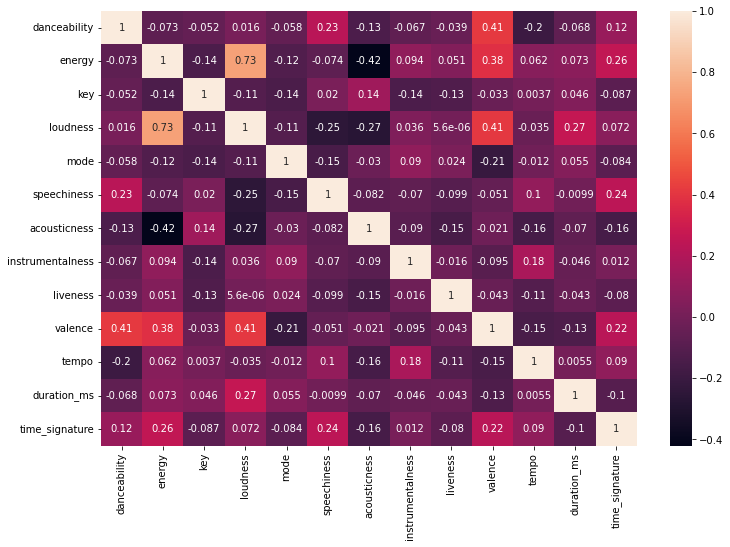

In [10]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(),annot = True)
plt.show()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



print("Relation exists between: ",correlation(df,0.4))

Relation exists between:  {'loudness', 'valence', 'acousticness'}



## Descriptive Statistics

In [12]:
#data dimension

df.shape

(100, 16)

In [13]:
#data summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  duration_ms       100 non-null    float64
 15  time_signature    100 non-null    float64
dtypes: float64(13), object(3)
memory usage: 12.6+

In [15]:
#statistics for all column

df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [16]:
df.describe(include='object')

,id,name,artists
count,100,100,100
unique,100,100,70
top,6DCZcSspjsKoFjzjrWoCd,God's Plan,Post Malone
freq,1,1,6


### Measuring Central Tendency - Mean, Median, Mode

In [19]:
mean = df.mean()

print(mean)

danceability             0.716460
energy                   0.659060
key                      5.330000
loudness                -5.677640
mode                     0.590000
speechiness              0.115569
acousticness             0.195701
instrumentalness         0.001584
liveness                 0.158302
valence                  0.484443
tempo                  119.904180
duration_ms         205206.780000
time_signature           3.980000
dtype: float64


In [20]:
median = df.median()

print(median)

danceability             0.73300
energy                   0.67800
key                      5.00000
loudness                -5.56650
mode                     1.00000
speechiness              0.07495
acousticness             0.10900
instrumentalness         0.00000
liveness                 0.11850
valence                  0.47050
tempo                  120.11600
duration_ms         205047.50000
time_signature           4.00000
dtype: float64


In [24]:
mean = df['duration_ms'].mean()

print(mean)

median = df['duration_ms'].median()

print(median)

mode = df['duration_ms'].mode()

print(mode)

205206.78
205047.5
0      95467.0
1     119133.0
2     121887.0
3     131064.0
4     135090.0
        ...   
95    263400.0
96    268867.0
97    276147.0
98    312820.0
99    417920.0
Name: duration_ms, Length: 100, dtype: float64


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

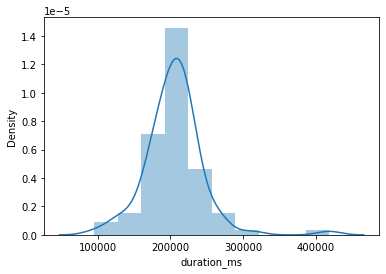

In [25]:
#Displot

data = df['duration_ms']

sns.distplot(data, bins=10, hist=True, kde=True, label = 'duration_ms')

In [27]:
df['duration_ms'].skew()

1.2901236134431127

The above plot confirms that the duration in millisecond have little positive skewness.

In [28]:
df['duration_ms'].kurt()

7.8991344299823485

kurtosis to be 7.8. So, it is greater than 3 and so excess kurtosis > 0. 
Hence, we can conclude that the Revenue (in millions) curve is a leptokurtic curve. 
As compared to a normal distribution, its central peak is higher and sharper, and its tails are longer and fatter.

In [29]:
df.skew()

danceability       -0.825076
energy             -0.596613
key                 0.002630
loudness           -0.460573
mode               -0.371575
speechiness         2.072900
acousticness        1.616843
instrumentalness    9.843044
liveness            2.005565
valence             0.041956
tempo               0.625235
duration_ms         1.290124
time_signature     -2.269635
dtype: float64

<hr> Measure</h3>

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.<br>
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.<br>
If the skewness is less than -1 or greater than 1, the data are highly skewed.

<hr> Interpretation: </h3>

Positive skewness: right tail is long relative to the left tail.<br>
Negative Skewness:  left tail is long relative to the right tail.<br>
Zero Skewness: perfectly symmetrical has a skewness of 0 and Mean = Median = Mode

<AxesSubplot:xlabel='speechiness', ylabel='Density'>

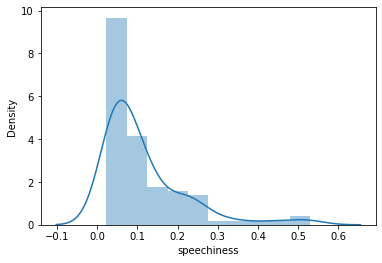

In [34]:
sns.distplot(df["speechiness"], bins=10, hist=True, kde=True, label = 'duration_ms')

In [35]:
df.kurt()

danceability         1.626851
energy              -0.193944
key                 -1.361705
loudness            -0.203822
mode                -1.900351
speechiness          4.654142
acousticness         1.964726
instrumentalness    97.773418
liveness             4.231941
valence             -0.667233
tempo               -0.207564
duration_ms          7.899134
time_signature      22.728229
dtype: float64

<h3>Kurtosis</h3><br>

Kurtosis is the degree of peakedness of a distribution.<br>
Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly and have heavy tails.<br>
Data sets with low kurtosis tend to have a flat top near the mean rather than a sharp peak.<br>

<h3>Reference range for kurtosis</h3><br>
The reference standard is a normal distribution, which has a kurtosis of 3.<br>
Often, excess kurtosis is presented instead of kurtosis, where excess kurtosis is simply kurtosis - 3.<br>
<h3>Mesokurtic curve</h3><br>
A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0).<br>
Any distribution with kurtosis ≈3 (excess ≈ 0) is called mesokurtic.<br>
<h3>Platykurtic curve</h3><br>
A distribution with kurtosis < 3 (excess kurtosis < 0) is called platykurtic.<br>
As compared to a normal distribution, its central peak is lower and broader, and its tails are shorter and thinner.<br>

<h3>Leptokurtic curve</h3><br>
A distribution with kurtosis > 3 (excess kurtosis > 0) is called leptokurtic.<br>
As compared to a normal distribution, its central peak is higher and sharper, and its tails are longer and fatter.<br>